In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

from datetime import timedelta

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('P:/My Documents/Books & Research/Analytics Vidya Blackbelt program/Retail demand prediction/B1G6ipV5TZsnUOqlBY1Q_4 FeatureEngineeringDatasetandnotebooks-191226-111656/4 FeatureEngineeringDatasetandnotebooks-191226-111656/updated_dataset/updated_train_data.csv')

In [3]:
train_data.head()

,WEEK_END_DATE,STORE_NUM,UPC,BASE_PRICE,FEATURE,DISPLAY,UNITS
0,14-Jan-09,367,1111009477,1.57,0,0,13
1,14-Jan-09,367,1111009497,1.39,0,0,20
2,14-Jan-09,367,1111085319,1.88,0,0,14
3,14-Jan-09,367,1111085345,1.88,0,0,29
4,14-Jan-09,367,1111085350,1.98,0,0,35


In [4]:
# convert the WEEK_END_DATE to datetime
train_data['WEEK_END_DATE'] = pd.to_datetime(train_data['WEEK_END_DATE'])

In [5]:
# first and last week in the dataset
train_data.WEEK_END_DATE.min() , train_data.WEEK_END_DATE.max()

(Timestamp('2009-01-14 00:00:00'), Timestamp('2011-09-28 00:00:00'))

In [6]:
# number of weeks in the dataset
train_data.WEEK_END_DATE.nunique()

142

In [7]:
# create an array of unique week dates
week = train_data.WEEK_END_DATE.unique()

In [8]:
# read the other datasets
product_data = pd.read_csv("P:/My Documents/Books & Research/Analytics Vidya Blackbelt program/Retail demand prediction/Feature_engineering/updated_product_data.csv")

store_data = pd.read_csv('P:/My Documents/Books & Research/Analytics Vidya Blackbelt program/Retail demand prediction/Feature_engineering/updated_store_data.csv')

In [9]:
product_data.head()

,UPC,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,MANUFACTURER_4,MANUFACTURER_5,MANUFACTURER_6,MANUFACTURER_7,MANUFACTURER_8,MANUFACTURER_9,...,CATEGORY_3,CATEGORY_4,SUB_CATEGORY_1,SUB_CATEGORY_2,SUB_CATEGORY_3,SUB_CATEGORY_4,SUB_CATEGORY_5,SUB_CATEGORY_6,SUB_CATEGORY_7,PRODUCT_SIZE
0,1111009477,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
1,1111009497,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
2,1111009507,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,1111038078,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1111038080,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [10]:
store_data.head()

,STORE_ID,ADDRESS_STATE_PROV_CODE_1,ADDRESS_STATE_PROV_CODE_2,ADDRESS_STATE_PROV_CODE_3,ADDRESS_STATE_PROV_CODE_4,MSA_CODE_1,MSA_CODE_2,MSA_CODE_3,MSA_CODE_4,MSA_CODE_5,MSA_CODE_6,MSA_CODE_7,MSA_CODE_8,MSA_CODE_9,SEG_VALUE_NAME,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,1,0,0,0,1,0,0,0,0,0,0,0,0,1,24721,12707
1,389,1,0,0,0,1,0,0,0,0,0,0,0,0,2,46073,24767
2,613,0,1,0,0,0,1,0,0,0,0,0,0,0,2,64926,29386
3,623,0,1,0,0,0,0,1,0,0,0,0,0,0,2,46930,36741
4,2277,0,0,1,0,1,0,0,0,0,0,0,0,0,3,81958,54053


In [11]:
merged_data = train_data.merge(product_data,how='left', on='UPC')
merged_data = merged_data.merge(store_data, how='left', left_on='STORE_NUM', right_on='STORE_ID')

In [12]:
merged_data = merged_data.drop(columns=['STORE_ID'])

In [13]:
merged_data.loc[0]

WEEK_END_DATE                2009-01-14 00:00:00
STORE_NUM                                    367
UPC                                   1111009477
BASE_PRICE                                  1.57
FEATURE                                        0
DISPLAY                                        0
UNITS                                         13
MANUFACTURER_1                                 1
MANUFACTURER_2                                 0
MANUFACTURER_3                                 0
MANUFACTURER_4                                 0
MANUFACTURER_5                                 0
MANUFACTURER_6                                 0
MANUFACTURER_7                                 0
MANUFACTURER_8                                 0
MANUFACTURER_9                                 0
CATEGORY_1                                     1
CATEGORY_2                                     0
CATEGORY_3                                     0
CATEGORY_4                                     0
SUB_CATEGORY_1      

In [14]:
merged_data.head()

,WEEK_END_DATE,STORE_NUM,UPC,BASE_PRICE,FEATURE,DISPLAY,UNITS,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,...,MSA_CODE_3,MSA_CODE_4,MSA_CODE_5,MSA_CODE_6,MSA_CODE_7,MSA_CODE_8,MSA_CODE_9,SEG_VALUE_NAME,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,2009-01-14,367,1111009477,1.57,0,0,13,1,0,0,...,0,0,0,0,0,0,0,1,24721,12707
1,2009-01-14,367,1111009497,1.39,0,0,20,1,0,0,...,0,0,0,0,0,0,0,1,24721,12707
2,2009-01-14,367,1111085319,1.88,0,0,14,1,0,0,...,0,0,0,0,0,0,0,1,24721,12707
3,2009-01-14,367,1111085345,1.88,0,0,29,1,0,0,...,0,0,0,0,0,0,0,1,24721,12707
4,2009-01-14,367,1111085350,1.98,0,0,35,1,0,0,...,0,0,0,0,0,0,0,1,24721,12707


In [15]:
merged_data['SALES_AREA_SIZE_NUM'].describe()
#merged_data['PRODUCT_SIZE'].describe()

count    232266.000000
mean      50722.259453
std       13520.385454
min       10788.000000
25%       46073.000000
50%       48813.000000
75%       55663.000000
max       86517.000000
Name: SALES_AREA_SIZE_NUM, dtype: float64

Some other feature engineering for 1) time based feature 2) store related engineered  features 3) product relatd engineered features

In [16]:
# time based features

merged_data['MONTH'] = merged_data['WEEK_END_DATE'].dt.month
merged_data['YEAR'] = merged_data['WEEK_END_DATE'].dt.year
merged_data['WEEK_OF_YEAR'] = merged_data['WEEK_END_DATE'].dt.isocalendar().week
merged_data['Is_Holiday_Season'] = merged_data['MONTH'].apply(lambda x: 1 if x in [11, 12] else 0) #  christmas
merged_data['Is_Summer'] = merged_data['MONTH'].apply(lambda x: 1 if x in [6,7,8] else 0) #summer months , when people take vacations

In [17]:
# store related features
merged_data['ROLLING_MEAN_4W'] = merged_data.groupby(['STORE_NUM', 'UPC'])['UNITS'].transform(lambda x: x.rolling(4, 1).mean()) # rolling mean of last 4 weeks
merged_data['ROLLING_MEAN_4W'] = merged_data['ROLLING_MEAN_4W'].fillna(0)

merged_data['STORE_SIZE_CAT'] = pd.qcut(merged_data['SALES_AREA_SIZE_NUM'], q=4, labels=[1,2,3,4])
merged_data['MONTH_STORE_AVG'] = merged_data.groupby(['STORE_NUM', 'MONTH'])['UNITS'].transform('mean')

In [18]:
#product relatd engineered features
merged_data['STORE_PROD_AVG'] = merged_data.groupby(['STORE_NUM', 'UPC'])['UNITS'].transform('mean')

In [19]:
data = merged_data.drop(columns=['STORE_NUM', 'UPC'])

In [20]:
def validation_df(data, week, no_of_months, no_of_validation):
    
    model_set = []
    set_n = 1
    for w in range(len(week)-1,0,-1):
        x_data = {}

        x_data['train_start'] = week[w-3-4*no_of_months]
        x_data['train_end'] = week[w-4]
        x_data['validate_week'] = week[w-2]
        x_data['test_week'] = week[w]
        x_data['no_days_train'] = x_data['train_end'] - x_data['train_start']
        x_data['set_no'] = 'set'+str(set_n)
        set_n +=1
        model_set.append(x_data)
        if(len(model_set) == no_of_validation):
            break
        
        
    datapoints = []

    for s in model_set :
        x = {}
        train_set = data[(data.WEEK_END_DATE >= s['train_start']) & (data.WEEK_END_DATE <= s['train_end'])]
        x['train_shape'] = train_set.shape[0]
        x['validation_shape']  = data[data.WEEK_END_DATE == s['validate_week']].shape[0]
        x['test_shape'] = data[data.WEEK_END_DATE == s['test_week']].shape[0]
        x.update(s)
        datapoints.append(x)

    df = pd.DataFrame.from_dict(datapoints)
    df['no_days_train'] = df['no_days_train'] + timedelta(days=7)
    return df    

In [21]:
data_with_all_cols = merged_data.copy()

In [22]:
# validation sets for training size = 3 months and number of validation sets = 3
validation_df(merged_data, week, no_of_months= 3, no_of_validation= 3)

,train_shape,validation_shape,test_shape,train_start,train_end,validate_week,test_week,no_days_train,set_no
0,19647,1640,1642,2011-06-15,2011-08-31,2011-09-14,2011-09-28,84 days,set1
1,19657,1632,1638,2011-06-08,2011-08-24,2011-09-07,2011-09-21,84 days,set2
2,19654,1629,1640,2011-06-01,2011-08-17,2011-08-31,2011-09-14,84 days,set3


In [23]:
# validation sets for training size = 6 months and number of validation sets = 4
validation_df(merged_data, week, no_of_months= 6, no_of_validation= 4)

,train_shape,validation_shape,test_shape,train_start,train_end,validate_week,test_week,no_days_train,set_no
0,39294,1640,1642,2011-03-23,2011-08-31,2011-09-14,2011-09-28,168 days,set1
1,39308,1632,1638,2011-03-16,2011-08-24,2011-09-07,2011-09-21,168 days,set2
2,39308,1629,1640,2011-03-09,2011-08-17,2011-08-31,2011-09-14,168 days,set3
3,39308,1640,1632,2011-03-02,2011-08-10,2011-08-24,2011-09-07,168 days,set4


In [24]:
valid_df = validation_df(data_with_all_cols, week, no_of_months=2, no_of_validation=14)

In [25]:
# function to calculate the root mean squared log error
def get_msle(true, predicted) :
    return np.sqrt(msle( true, predicted))

# function to train the model 
# it will calculate and return the RMSLE on train and validation set
def my_model(train_d, validate_d):
    
    train_x = train_d.drop(columns=['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'UNITS'])
    train_y = train_d['UNITS']
    
    valid_x = validate_d.drop(columns=['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'UNITS'])
    valid_y = validate_d['UNITS']
    
    model_RFR = RandomForestRegressor(max_depth=20,random_state=0)
    model_RFR.fit(train_x, train_y)
            
    predict_validate = model_RFR.predict(valid_x)
    predict_validate = predict_validate.clip(min=0)
    
    return get_msle(valid_y, predict_validate)
    

# function will extract the train and validation set using validation dataframe
# The defined model will train on each of the set and the average RMSLE and standard deviation on validation 
    
def train_model(df, data):
    model_results = []
    for row in tqdm(range(df.shape[0]), leave=False, desc='training_model'):
        row_data = df.iloc[row]
        train_set = data[(data.WEEK_END_DATE >= row_data['train_start']) & (data.WEEK_END_DATE <= row_data['train_end'])]
        validate_set = data[data.WEEK_END_DATE == row_data['validate_week']]        
        rmsle = my_model(train_set, validate_set)
        model_results.append(rmsle)
        
    return np.mean(model_results)

def get_columns(data_sample):
    columns_to_drop = ['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'UNITS']
    features = [col for col in data_sample.columns if col not in columns_to_drop]
    return features

In [33]:
#model_RFR = RandomForestRegressor(n_estimators=75, max_depth=15, random_state=0, n_jobs=-1)
model_RFR = RandomForestRegressor(n_estimators=400, max_depth=20, random_state=0, n_jobs=-1)

In [27]:
rmsle_valid_new = train_model(valid_df, data_with_all_cols)

In [28]:
sample_row = valid_df.iloc[0]
sample_train_set = data_with_all_cols[
    (data_with_all_cols.WEEK_END_DATE >= sample_row['train_start']) & 
    (data_with_all_cols.WEEK_END_DATE <= sample_row['train_end'])
]
features = get_columns(sample_train_set)
print(f"Validation RMSLE: {rmsle_valid_new:.4f}")

Validation RMSLE: 0.4064


In [29]:
data_no_new_features = merged_data.copy()

In [30]:
new_feature_cols = ['MONTH', 'YEAR', 'WEEK_OF_YEAR', 'Is_Holiday_Season', 'Is_Summer', 
                    'ROLLING_MEAN_4W', 'STORE_SIZE_CAT', 'MONTH_STORE_AVG', 'STORE_PROD_AVG']

In [31]:
existing_new_cols = [col for col in new_feature_cols if col in data_no_new_features.columns]
data_no_new_features = data_no_new_features.drop(columns=existing_new_cols)
rmsle_valid_old = train_model(valid_df, data_no_new_features)

In [45]:
print(rmsle_valid_old)

0.5105355782098177


In [32]:
improvement = rmsle_valid_old - rmsle_valid_new
improvement_pct = (improvement / rmsle_valid_old) * 100
print(f"\nImprovement with new features: {improvement:.4f} ({improvement_pct:.2f}%)")


Improvement with new features: 0.1042 (20.40%)


In [34]:
def my_model_with_importance(train_d, validate_d):
    
    train_x = train_d.drop(columns=['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'UNITS'])
    train_y = train_d['UNITS']
    
    valid_x = validate_d.drop(columns=['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'UNITS'])
    valid_y = validate_d['UNITS']
    
    model_RFR = RandomForestRegressor(max_depth=20, random_state=0, n_estimators=400)
    model_RFR.fit(train_x, train_y)
            
    predict_validate = model_RFR.predict(valid_x)
    predict_validate = predict_validate.clip(min=0)
    
    return get_msle(valid_y, predict_validate), model_RFR, train_x.columns

In [35]:
sample_row = valid_df.iloc[0]
train_set = data_with_all_cols[
    (data_with_all_cols.WEEK_END_DATE >= sample_row['train_start']) & 
    (data_with_all_cols.WEEK_END_DATE <= sample_row['train_end'])
]

In [36]:
validate_set = data_with_all_cols[data_with_all_cols.WEEK_END_DATE == sample_row['validate_week']]

In [37]:
rmsle, model, feature_names = my_model_with_importance(train_set, validate_set)

In [38]:
feature_importance = model.feature_importances_

In [39]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance}).sort_values('Importance', ascending=False)
print(importance_df.head(20).to_string(index=False))

                  Feature  Importance
          ROLLING_MEAN_4W    0.605209
                  FEATURE    0.219081
           STORE_PROD_AVG    0.066484
             WEEK_OF_YEAR    0.027786
               BASE_PRICE    0.018490
          MONTH_STORE_AVG    0.013287
       AVG_WEEKLY_BASKETS    0.008498
      SALES_AREA_SIZE_NUM    0.008341
                  DISPLAY    0.006485
             PRODUCT_SIZE    0.003048
           SEG_VALUE_NAME    0.002463
           SUB_CATEGORY_7    0.002245
ADDRESS_STATE_PROV_CODE_3    0.001959
                    MONTH    0.001761
ADDRESS_STATE_PROV_CODE_2    0.001540
           STORE_SIZE_CAT    0.001483
           MANUFACTURER_5    0.001437
           SUB_CATEGORY_3    0.001286
               MSA_CODE_1    0.001084
           MANUFACTURER_2    0.000988


In [40]:
new_features = ['MONTH', 'YEAR', 'WEEK_OF_YEAR', 'Is_Holiday_Season', 'Is_Summer', 
                'ROLLING_MEAN_4W', 'STORE_SIZE_CAT', 'MONTH_STORE_AVG', 'STORE_PROD_AVG']

# Ranking of new engineered features
for feature in new_features:
    if feature in importance_df['Feature'].values:
        rank = importance_df[importance_df['Feature'] == feature].index[0] + 1
        imp = importance_df[importance_df['Feature'] == feature]['Importance'].values[0]
        print(f"{feature}: Rank {rank}, Importance: {imp:.4f}")
    else:
        print(f"{feature}: Not in feature set")

MONTH: Rank 41, Importance: 0.0018
YEAR: Rank 42, Importance: 0.0000
WEEK_OF_YEAR: Rank 43, Importance: 0.0278
Is_Holiday_Season: Rank 44, Importance: 0.0000
Is_Summer: Rank 45, Importance: 0.0000
ROLLING_MEAN_4W: Rank 46, Importance: 0.6052
STORE_SIZE_CAT: Rank 47, Importance: 0.0015
MONTH_STORE_AVG: Rank 48, Importance: 0.0133
STORE_PROD_AVG: Rank 49, Importance: 0.0665


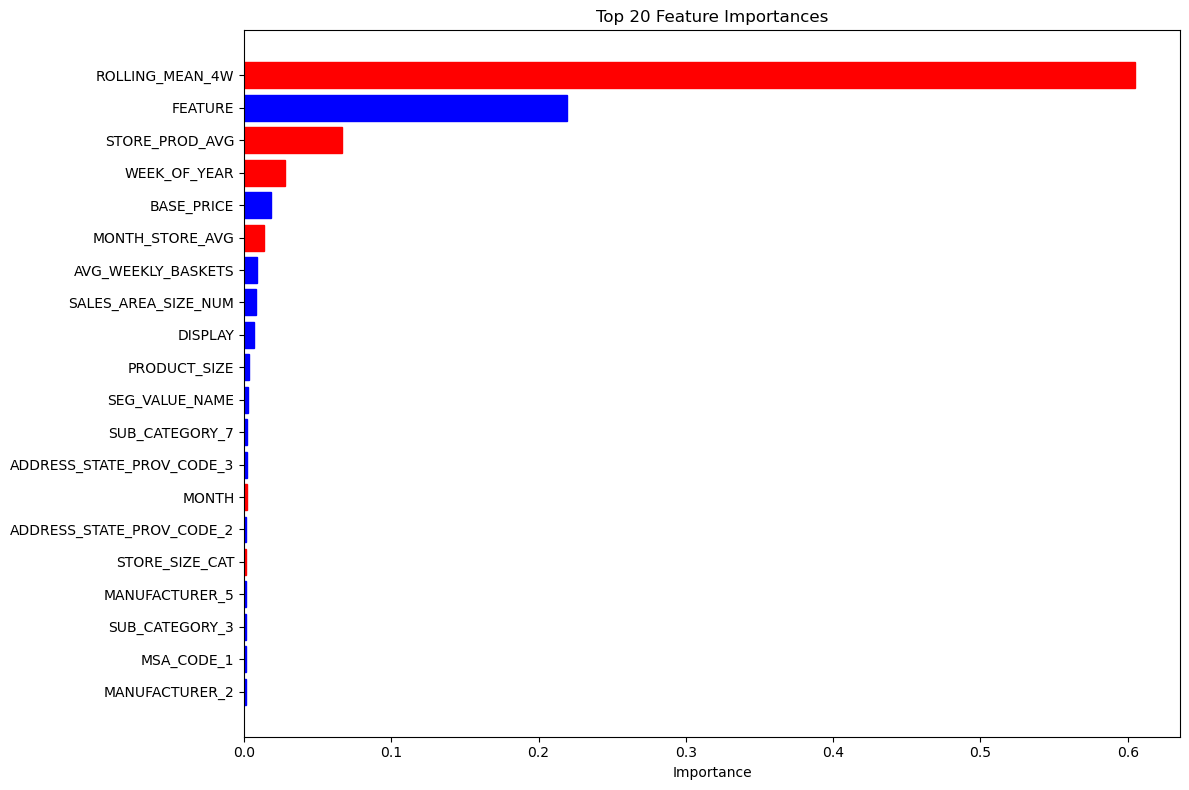

In [46]:
# Simple bar plot for top 20 features
plt.figure(figsize=(12, 8))
top_20 = importance_df.head(20)
bars = plt.barh(top_20['Feature'][::-1], top_20['Importance'][::-1])

# Color new features differently
for i, (bar, feature) in enumerate(zip(bars, top_20['Feature'][::-1])):
    if feature in new_features:
        bar.set_color('red')
    else:
        bar.set_color('blue')

plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

In [42]:
def train_model_with_depth(df, data, max_depth=20):
    model_results = []
    for row in tqdm(range(df.shape[0]), leave=False, desc=f'training_model (depth={max_depth})'):
        row_data = df.iloc[row]
        train_set = data[
            (data.WEEK_END_DATE >= row_data['train_start']) & 
            (data.WEEK_END_DATE <= row_data['train_end'])
        ]
        validate_set = data[data.WEEK_END_DATE == row_data['validate_week']]
        
        train_x = train_set.drop(columns=['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'UNITS'])
        train_y = train_set['UNITS']
        
        valid_x = validate_set.drop(columns=['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'UNITS'])
        valid_y = validate_set['UNITS']
        
        model_RFR = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=400)
        model_RFR.fit(train_x, train_y)
                
        predict_validate = model_RFR.predict(valid_x)
        predict_validate = predict_validate.clip(min=0)
        
        rmsle = get_msle(valid_y, predict_validate)
        model_results.append(rmsle)
        
    return np.mean(model_results)

In [43]:
# Tuning max_depth with new features 
depth_results_new = []

for depth in tqdm(range(10, 25, 1), leave=True, desc='max_depth with new features'):    
    rmsle_valid = train_model_with_depth(valid_df, data_with_all_cols, max_depth=depth)
    depth_results_new.append({'depth': depth, 'rmsle_valid': rmsle_valid})

depth_df_new = pd.DataFrame.from_dict(depth_results_new)
print(depth_df_new.to_string(index=False))

# Find best depth
best_depth_row = depth_df_new.loc[depth_df_new['rmsle_valid'].idxmin()]
print(f"Best validation RMSLE: {best_depth_row['rmsle_valid']:.4f}")

depth_results_old = []

for depth in tqdm(range(10, 25, 1), leave=True, desc='max_depth (no new features)'):
    rmsle_valid = train_model_with_depth(valid_df, data_no_new_features, max_depth=depth)
    depth_results_old.append({'depth': depth, 'rmsle_valid': rmsle_valid})

depth_df_old = pd.DataFrame(depth_results_old)
best_depth_row_old = depth_df_old.loc[depth_df_old['rmsle_valid'].idxmin()]

# Calculate final improvement
final_improvement = best_depth_row_old['rmsle_valid'] - best_depth_row['rmsle_valid']
final_improvement_pct = (final_improvement / best_depth_row_old['rmsle_valid']) * 100
print(f"\nFinal improvement with new features and tuned depth: {final_improvement:.4f} ({final_improvement_pct:.2f}%)")

max_depth with new features: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [2:11:26<00:00, 525.77s/it]


 depth  rmsle_valid
    10     0.386139
    11     0.389109
    12     0.392271
    13     0.394750
    14     0.397090
    15     0.399074
    16     0.400726
    17     0.402114
    18     0.403206
    19     0.404140
    20     0.404715
    21     0.405081
    22     0.405559
    23     0.405850
    24     0.405875
Best validation RMSLE: 0.3861


max_depth (no new features): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [49:23<00:00, 197.58s/it]


Final improvement with new features and tuned depth: 0.1232 (24.19%)


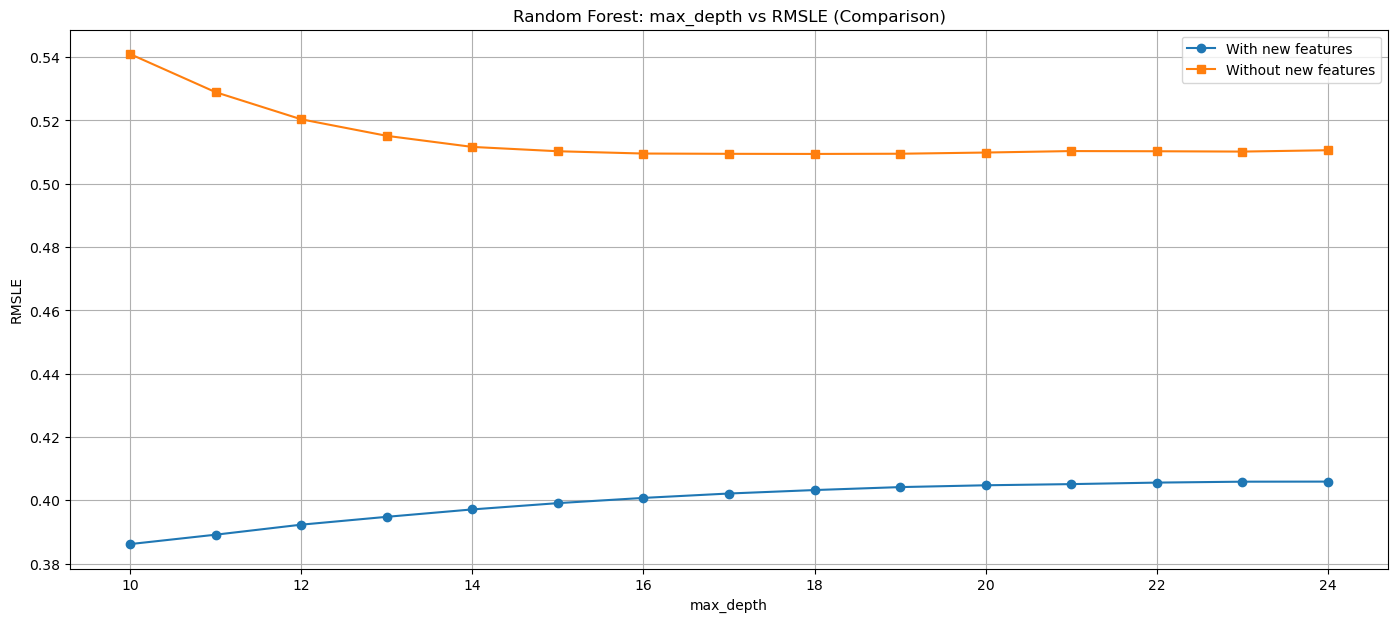

In [44]:
# Plot results
plt.figure(figsize=(17, 7))
plt.plot(depth_df_new['depth'], depth_df_new['rmsle_valid'], marker='o', label='With new features')
plt.plot(depth_df_old['depth'], depth_df_old['rmsle_valid'], marker='s', label='Without new features')
plt.title('Random Forest: max_depth vs RMSLE (Comparison)')
plt.ylabel('RMSLE')
plt.xlabel('max_depth')
plt.legend()
plt.grid(True)
plt.show()